
# Project 2 Naya Data Scientist training course
1. Load The data, turn the date into datetime type
2. Find what was the Month, week, day that had the most sales, highest sales prices
3. Calculate the price per one **life_sq**
4. Find the **sub_area** that have the highest prices per **sub_area**
5. for each one of the sub areas what are the top 3 columns with the largest number of nuls
6. Choose a **sub_area** and for each of the 3 columns with the most number of nuls:
   Find a value to fill these nuls, explain why you chose this value

7. Do an extensive EDA

# 1. Load The data, turn the date into datetime type 

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import model_selection, preprocessing
color = sns.color_palette()
#pd.set_option('display.float_format',lambda x: '%.2f'%x)
%matplotlib inline

In [71]:
train_df = pd.read_csv("../input/train.csv")
train_df.shape

(30471, 292)

In [3]:
train_df_nuls=train_df.copy(deep=True)

In [4]:
train_df.describe()


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


# 2. Find what was the Month, week, day that had the most sales, highest sales prices# 

In [5]:
train_df['new_datetime'] = pd.to_datetime(train_df.timestamp)
train_df['yearmonth'] = train_df['timestamp'].apply(lambda x:x[5:7])
train_df['year'] = train_df.new_datetime.dt.year 
train_df.yearmonth
max_sales_month = train_df.yearmonth.value_counts() # Ordered Desc
pd.DataFrame(max_sales_month.reset_index().values,columns = ['Month','Sales_per_Month']).head()

,Month,Sales_per_Month
0,12,3400
1,04,3191
2,03,2972
3,11,2970
4,10,2736


In [6]:
# Most sales per months in specifuc year
df_yw = pd.DataFrame({'col':train_df.timestamp})
df_yw['col']=pd.to_datetime(df_yw['col'])

train_df['week_num'] = df_yw.col.dt.strftime('%Y-w%U') #'%Y-w%U'
#grouped_df_week = train_df.groupby('week_num')['price_doc'].aggregate(np.max).reset_index()
max_sales_week_num = train_df.week_num.value_counts()  # ordered Desc
#Most sales per week 
pd.DataFrame(max_sales_week_num.reset_index().values,columns = ['Week_year','Sales_per_week']).head()

,Week_year,Sales_per_week
0,2014-w50,590
1,2014-w49,439
2,2014-w48,424
3,2014-w25,401
4,2014-w47,373


In [7]:
# most sales in month seasonally 

df_yw = pd.DataFrame({'col':train_df.timestamp})
df_yw['col']=pd.to_datetime(df_yw['col'])

train_df['week'] = df_yw.col.dt.strftime('w%U') #'%Y-w%U'
#grouped_df_week = train_df.groupby('week_num')['price_doc'].aggregate(np.max).reset_index()
max_sales_week = train_df.week.value_counts()  # ordered Desc
#Most sales per week 
pd.DataFrame(max_sales_week.reset_index().values,columns = ['Week','Sales_per_week']).head()

,Week,Sales_per_week
0,w50,968
1,w49,844
2,w48,823
3,w47,815
4,w13,800


In [8]:
train_df['week'] = df_yw.col.dt.strftime('w%U')
max_sales_week = train_df.week.value_counts()
pd.DataFrame(max_sales_week.reset_index().values,columns = ['Week','Sales_per_week']).head()

,Week,Sales_per_week
0,w50,968
1,w49,844
2,w48,823
3,w47,815
4,w13,800


In [9]:
train_df['day_year'] = train_df.new_datetime.dt.dayofyear# + '  - ' +train_df.new_datetime.dt.year
grouped_df_day = train_df.groupby(['year','day_year'])['price_doc'].count().reset_index().sort_values(by = ['price_doc'], ascending =False)
#max_sales_day = train_df[['year','day_year']].value_counts()  # ordered Desc
train_df['year'] = train_df.new_datetime.dt.year
# Most sales per day in the year
pd.DataFrame(grouped_df_day.values,columns = ['Year','Day_num','Sales_per_day']).head()


,Year,Day_num,Sales_per_day
0,2014,350,160
1,2014,343,147
2,2014,181,133
3,2014,352,118
4,2014,329,93


In [10]:
# Highest Prices per Month
grouped_df = train_df.groupby('yearmonth')['price_doc'].aggregate(np.max).reset_index()
grouped_df.sort_values(by = 'price_doc', ascending=False).head()


,yearmonth,price_doc
4,05,111111112
2,03,95122496
3,04,91066096
8,09,77000000
0,01,71249624


In [11]:
# Highest Prices per Week
grouped_df_week = train_df.groupby('week_num')['price_doc'].aggregate(np.max).reset_index()
grouped_df_week.sort_values(by = 'price_doc', ascending=False).head()

,week_num,price_doc
37,2012-w19,111111112
185,2015-w10,95122496
86,2013-w15,91066096
144,2014-w21,80777440
80,2013-w09,78802248


In [12]:
# Highest Prices per Day in the year
grouped_df_day = train_df.groupby(['year','day_year'])['price_doc'].aggregate(np.max).reset_index().sort_values(by = ['price_doc'], ascending =False)
grouped_df_day.sort_values(by = 'price_doc', ascending=False).head()

,year,day_year,price_doc
200,2012,131,111111112
1068,2015,71,95122496
489,2013,109,91066096
830,2014,149,80777440
450,2013,65,78802248


# 3. Calculate the price per one life_sq 

In [13]:
train_df['price_per_life_sq']= train_df.price_doc.astype(long)/train_df['life_sq'].dropna().astype(long)

In [14]:
train_df['price_per_life_sq'].head()

0    216666.666667
1    315789.473684
2    196551.724138
3    262000.000000
4    212096.779221
Name: price_per_life_sq, dtype: float64

In [15]:

# test
train_df.price_doc.iloc[30469]/train_df['life_sq'].iloc[30469]


421875.0

# 4. Find the sub_area that have the highest prices per sub_area

In [16]:
train_df.groupby('sub_area')['price_doc'].aggregate(np.max).reset_index().sort_values(by = 'price_doc', ascending= False).head()


,sub_area,price_doc
130,Teplyj Stan,111111112
107,Presnenskoe,95122496
109,Ramenki,91066096
85,Pokrovskoe Streshnevo,78802248
59,Mar'ina Roshha,77000000


# 5. For each one of the sub areas what are the top 3 columns with the largest number of nuls

In [17]:
train_df['sub_area'].head()

0             Bibirevo
1    Nagatinskij Zaton
2       Tekstil'shhiki
3               Mitino
4            Basmannoe
Name: sub_area, dtype: object

In [18]:
#group_sub_area =train_df_nuls.groupby('sub_area').apply(lambda x: x[:])

group_sub_area_new= train_df.groupby('sub_area').apply(lambda x: pd.isnull(x).sum(axis = 0).reset_index().sort_values(by = 0, ascending= False).head(3)['index'].tolist())
pd.DataFrame(group_sub_area_new.reset_index().values,columns = ['Sub_Area','Top 3col with max nuls']).head()

,Sub_Area,Top 3col with max nuls
0,Ajeroport,"[state, build_year, kitch_sq]"
1,Akademicheskoe,"[state, build_year, max_floor]"
2,Alekseevskoe,"[state, build_year, kitch_sq]"
3,Altuf'evskoe,"[hospital_beds_raion, state, max_floor]"
4,Arbat,"[state, max_floor, material]"


# 6. Choose a sub_area and for each of the 3 columns with the most number of nuls: Find a value to fill these nuls, explain why you chose this value

In [19]:

pd.isnull(train_df[train_df['sub_area']=='Ajeroport'][group_sub_area_new.loc['Ajeroport']]).sum(axis = 0).reset_index().sort_values(by = 0, ascending= False).head(3).rename(columns={'index':'Name of columnin Ajeroport',0:'Count Nulls'})


,Name of columnin Ajeroport,Count Nulls
0,state,51
1,build_year,48
2,kitch_sq,47


In [20]:
#I will create mode/mean per each column with nulls in sub_area "Ajeroport"

mode_state_fl = train_df[train_df['sub_area']=='Ajeroport']['state'].mode() # mode =state category?
mean_build_year_fl = train_df[train_df['sub_area']=='Ajeroport']['build_year'].mean()
mean_num_room_fl = train_df[train_df['sub_area']=='Ajeroport']['num_room'].mean()

In [21]:
mode_state=int(round(mode_state_fl,0))
mean_build_year=int(round(mean_build_year_fl,0))
mean_num_room=int(round(mean_num_room_fl,0))

In [22]:
mean_num_room

2

In [23]:
#It will replace all missing values in state with mean of avaliable values,i've chosen to fill missing values with mean,so it will not change the distribution  
train_df[train_df['sub_area']=='Ajeroport']['state'].fillna(mode_state).reset_index().head()

,index,state
0,156,2.0
1,262,2.0
2,298,2.0
3,544,2.0
4,598,2.0


In [24]:
#It will replace all missing values in build_year with mean of avaliable values
pd.isnull(train_df[train_df['sub_area']=='Ajeroport']['build_year'])
train_df[train_df['sub_area']=='Ajeroport']['build_year'].fillna(mean_build_year).reset_index().head()

,index,build_year
0,156,1965.0
1,262,1965.0
2,298,1965.0
3,544,1965.0
4,598,1965.0


In [25]:
#It will replace all missing values in num_room with mean of avaliable values
train_df[train_df['sub_area']=='Ajeroport']['num_room'].fillna(mean_num_room).reset_index().head()

,index,num_room
0,156,2.0
1,262,2.0
2,298,2.0
3,544,2.0
4,598,2.0


# EDA


In [26]:
#Handling missing data

total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
hospital_beds_raion,14441,0.473926
build_year,13605,0.446490
state,13559,0.444980
cafe_sum_500_min_price_avg,13281,0.435857
cafe_sum_500_max_price_avg,13281,0.435857
cafe_avg_price_500,13281,0.435857
max_floor,9572,0.314135
material,9572,0.314135
num_room,9572,0.314135
kitch_sq,9572,0.314135


In [27]:
train_df = train_df.drop((missing_data[missing_data['Total'] >14000]).index,1)

In [28]:

train_df = train_df.drop((missing_data[missing_data['Total'] == 13281]).index,1)

In [29]:
train_df.isnull().sum().max()

13605

In [30]:
train_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sport_count_5000,market_count_5000,price_doc,new_datetime,yearmonth,year,week_num,week,day_year,price_per_life_sq
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,52,4,5850000,2011-08-20,08,2011,2011-w33,w33,232,2.166667e+05
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,66,14,6000000,2011-08-23,08,2011,2011-w34,w34,235,3.157895e+05
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,67,10,5700000,2011-08-27,08,2011,2011-w34,w34,239,1.965517e+05
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,26,3,13100000,2011-09-01,09,2011,2011-w35,w35,244,2.620000e+05
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,195,14,16331452,2011-09-05,09,2011,2011-w36,w36,248,2.120968e+05
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,113,17,9100000,2011-09-06,09,2011,2011-w36,w36,249,1.978261e+05
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,127,8,5500000,2011-09-08,09,2011,2011-w36,w36,251,3.928571e+05
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,47,4,2000000,2011-09-09,09,2011,2011-w36,w36,252,4.545455e+04
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,85,11,5300000,2011-09-10,09,2011,2011-w36,w36,253,1.962963e+05
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,67,1,2000000,2011-09-13,09,2011,2011-w37,w37,256,9.523810e+04


In [31]:
train_df = train_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
train_df.head()
# it's another way to handle missing values
#train_df = train_df.select_dtypes(include=[np.number]).interpolate().dropna()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,sport_count_5000,market_count_5000,price_doc,new_datetime,yearmonth,year,week_num,week,day_year,price_per_life_sq
0,1,2011-08-20,43,27.0,4.0,17.0,1.0,2014.0,2.0,1.0,...,52,4,5850000,2011-08-20,08,2011,2011-w33,w33,232,216666.666667
1,2,2011-08-23,34,19.0,3.0,17.0,1.0,2014.0,2.0,1.0,...,66,14,6000000,2011-08-23,08,2011,2011-w34,w34,235,315789.473684
2,3,2011-08-27,43,29.0,2.0,17.0,1.0,2014.0,2.0,1.0,...,67,10,5700000,2011-08-27,08,2011,2011-w34,w34,239,196551.724138
3,4,2011-09-01,89,50.0,9.0,17.0,1.0,2014.0,2.0,1.0,...,26,3,13100000,2011-09-01,09,2011,2011-w35,w35,244,262000.000000
4,5,2011-09-05,77,77.0,4.0,17.0,1.0,2014.0,2.0,1.0,...,195,14,16331452,2011-09-05,09,2011,2011-w36,w36,248,212096.779221


In [32]:
train_df.isnull().sum().max()

0

In [33]:
train_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [34]:
# i will create new variable " log_price" in train_df 
train_df['log_price']= np.log(train_df.price_doc)

('Skew is:', -0.68671567971889258)


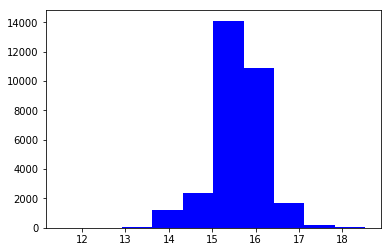

In [35]:
#We will check skewness, which is a measure of the shape of the distribution value
print ("Skew is:", train_df['log_price'].skew())
plt.hist(train_df['log_price'], color='blue')
plt.show()

In [36]:

print("Kurtosis: %f" % train_df['log_price'].kurt())


Kurtosis: 2.246656


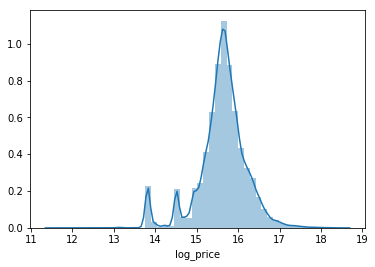

In [37]:
#histogram
sns.distplot((train_df['log_price']));

In [38]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

corr = numeric_features.corr()

print (corr['price_doc'].sort_values(ascending=False)[:5], '\n')
print (corr['price_doc'].sort_values(ascending=False)[-5:])

(price_doc           1.000000
log_price           0.829761
num_room            0.397644
full_sq             0.341840
sport_count_5000    0.294864
Name: price_doc, dtype: float64, '\n')
ttk_km               -0.272620
bulvar_ring_km       -0.279158
kremlin_km           -0.279249
sadovoe_km           -0.283622
zd_vokzaly_avto_km   -0.284069
Name: price_doc, dtype: float64


In [39]:
corr_val = train_df.corr()['price_doc']
high_corr_col = corr_val[np.abs(corr_val) >0.27].index
high_corr_col

Index([u'full_sq', u'num_room', u'ttk_km', u'sadovoe_km', u'bulvar_ring_km',
       u'kremlin_km', u'zd_vokzaly_avto_km', u'sport_count_2000',
       u'sport_count_3000', u'trc_count_5000', u'sport_count_5000',
       u'price_doc', u'log_price'],
      dtype='object')

In [40]:
new_train_df = train_df[list(high_corr_col)+['material']+['build_year']+['ecology']]

In [41]:
new_train_df = train_df[list(high_corr_col)+['material']].dropna()
new_train_df.reset_index(inplace=True)

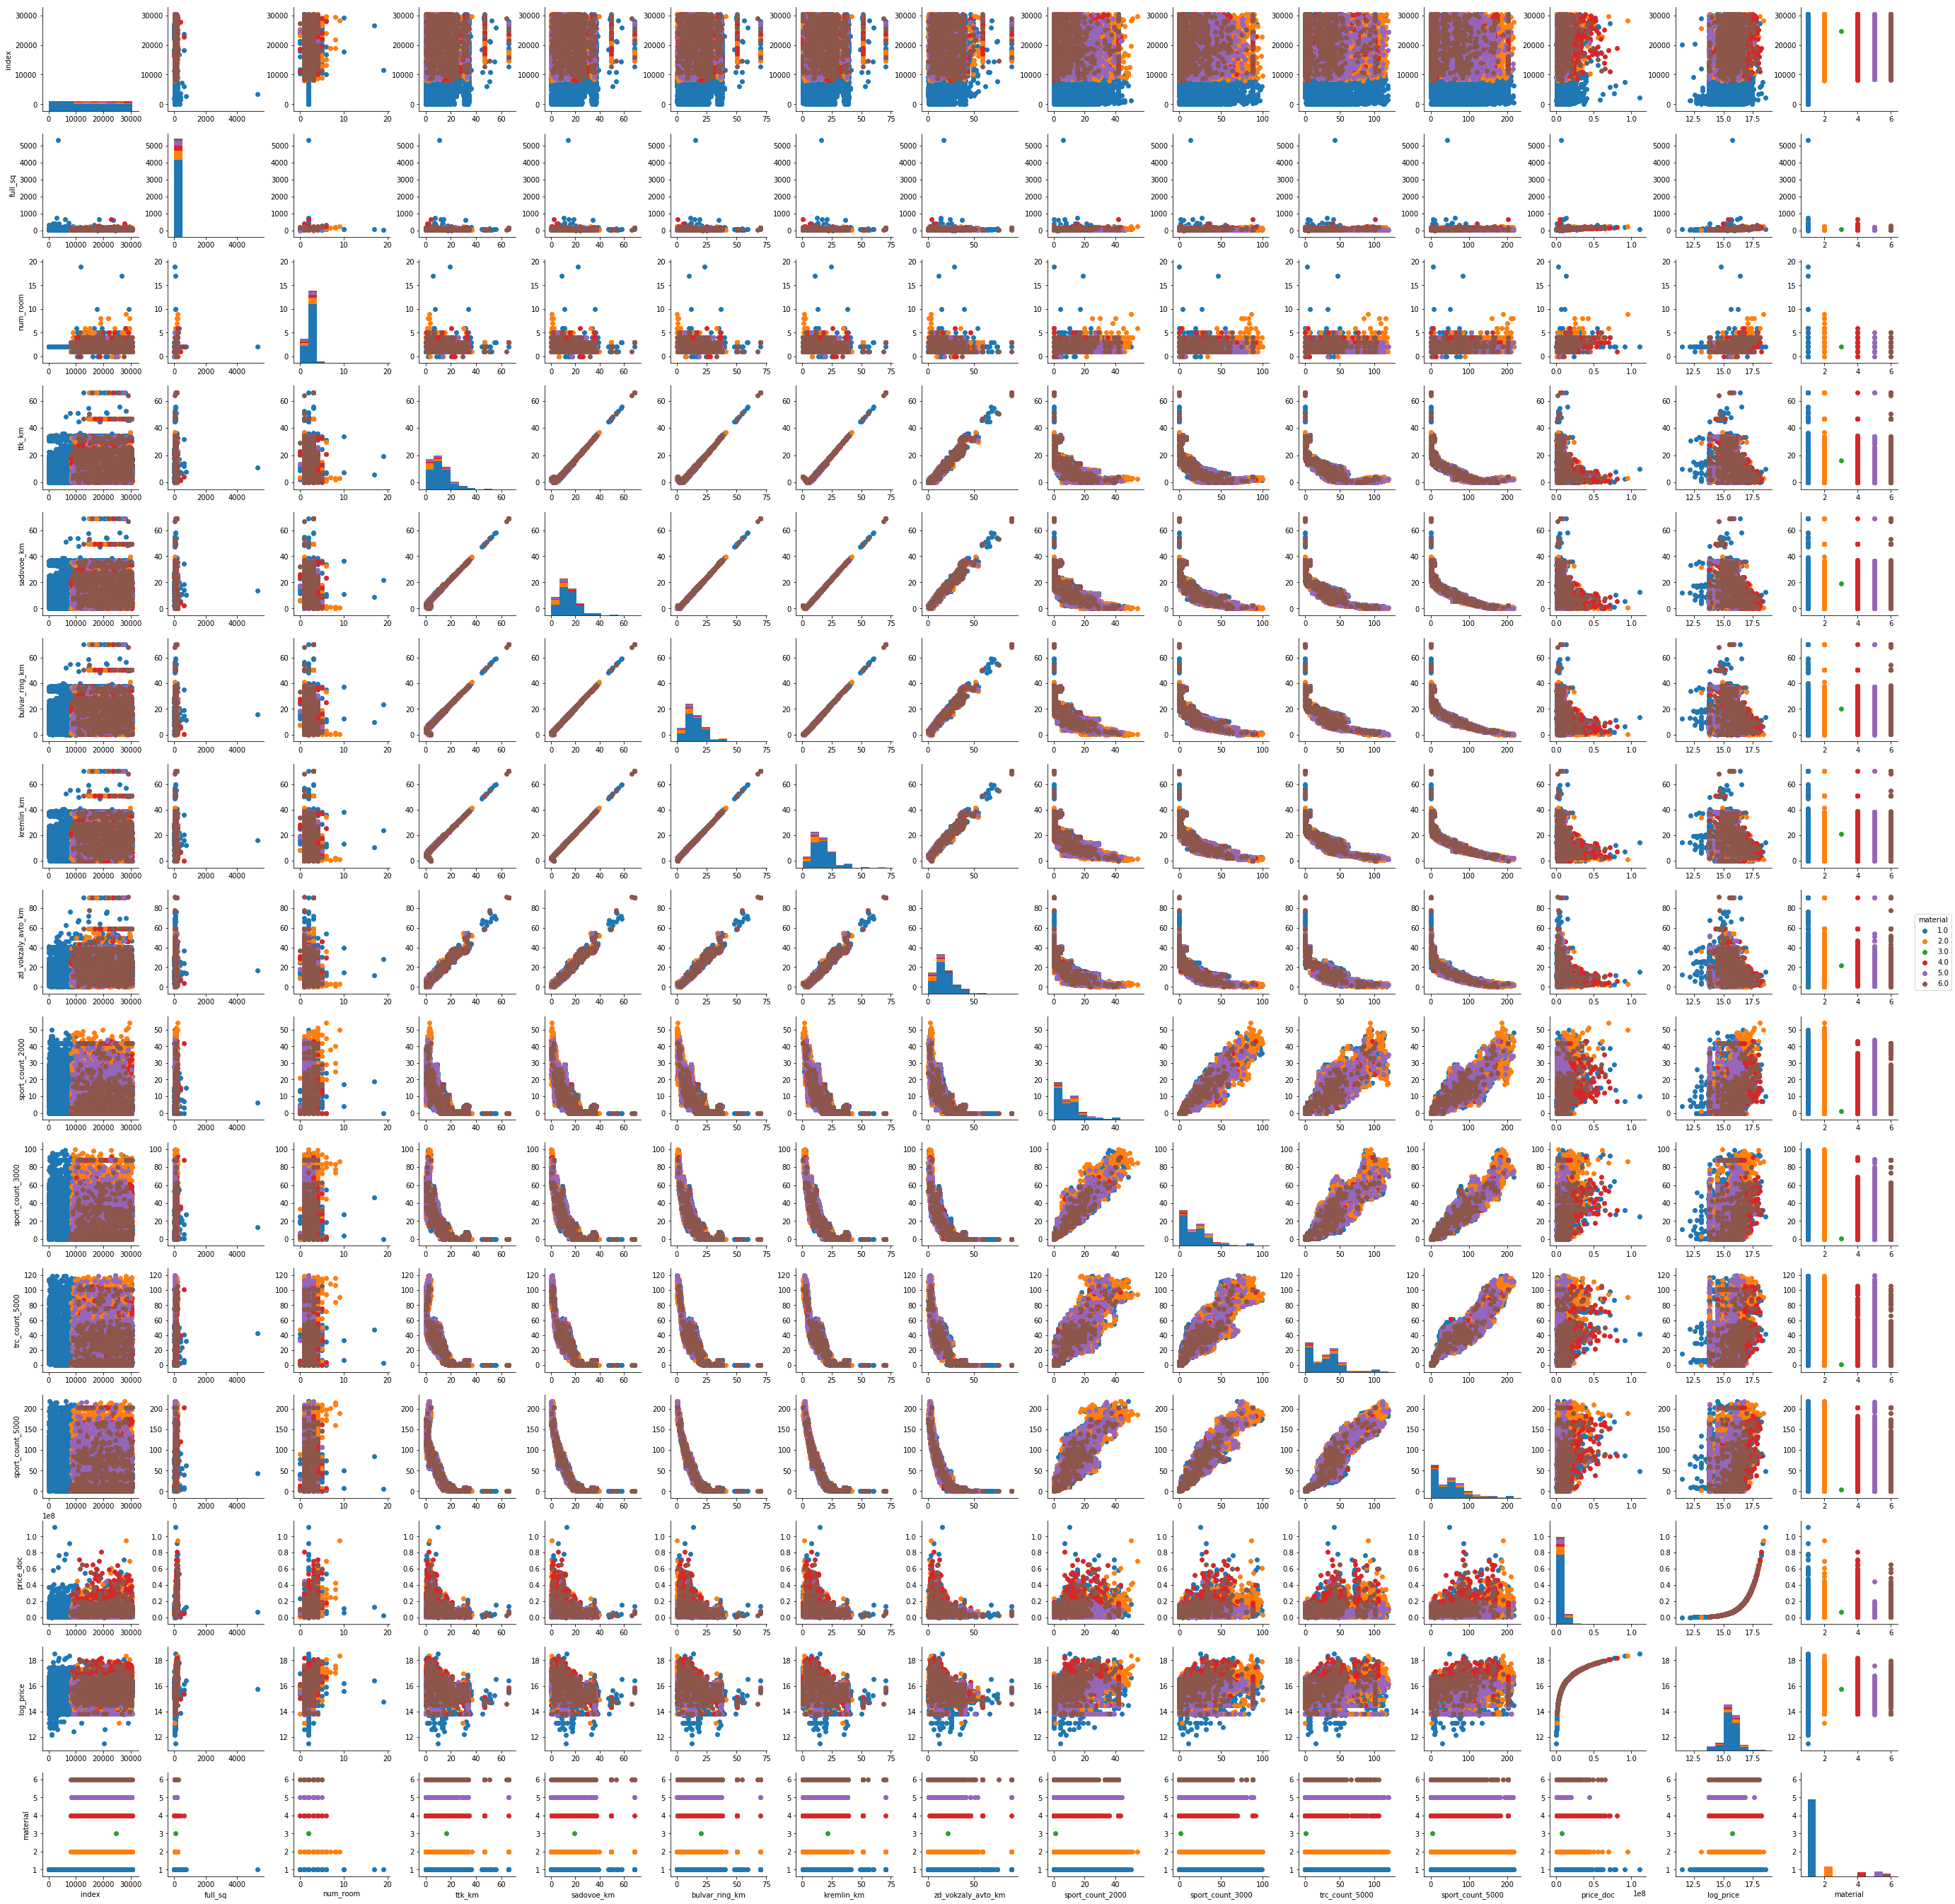

In [42]:
g = sns.PairGrid(new_train_df, hue="material")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

# let's analyze numeric features

In [43]:

numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes.head(10)

id              int64
full_sq         int64
life_sq       float64
floor         float64
max_floor     float64
material      float64
build_year    float64
num_room      float64
kitch_sq      float64
state         float64
dtype: object

In [44]:
# Let's see the correlation between the num features and the target(price)
corr = numeric_features.corr()

print (corr['price_doc'].sort_values(ascending=False)[:5], '\n')
print (corr['price_doc'].sort_values(ascending=False)[-5:])

(price_doc           1.000000
log_price           0.829761
num_room            0.397644
full_sq             0.341840
sport_count_5000    0.294864
Name: price_doc, dtype: float64, '\n')
ttk_km               -0.272620
bulvar_ring_km       -0.279158
kremlin_km           -0.279249
sadovoe_km           -0.283622
zd_vokzaly_avto_km   -0.284069
Name: price_doc, dtype: float64


i will create a pivot table to further investigate the relationship between num_room and price

In [45]:
# llet's build plots on num_room per price
train_df.num_room.unique()

array([  2.,   1.,   3.,   4.,   5.,   6.,   0.,  19.,  10.,   8.,   7.,
        17.,   9.])

In [46]:
room_pivot = train_df.pivot_table(index='num_room',
                                  values='price_doc', aggfunc=np.median)
room_pivot

,price_doc
num_room,
0.0,7590001
1.0,5250000
2.0,6292000
3.0,9205505
4.0,14400000
5.0,16850000
6.0,23000000
7.0,25500000
8.0,35000000


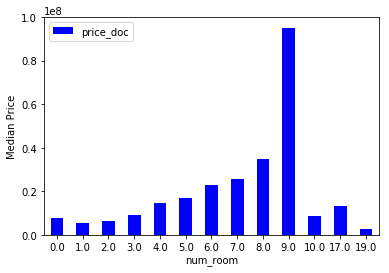

In [47]:
room_pivot.plot(kind='bar', color='blue')
plt.xlabel('num_room')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.show()

Full_sq per price

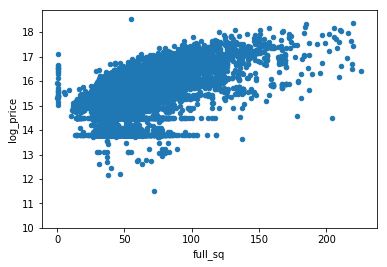

In [48]:
var = train_df[train_df['full_sq']<250] # i've fillterd out  all outlyers
data = pd.concat([var, train_df['log_price']], axis=0)
data.plot.scatter(x='full_sq',y='log_price', ylim=(10));


In [49]:
# to dig on full_sq
full_pivot = train_df.pivot_table(index='full_sq',
                                  values='price_doc', aggfunc=np.median)

In [50]:
full_pivot.head()

,price_doc
full_sq,
0,6296254.0
1,6465958.0
5,5770000.0
6,5177040.0
9,6300000.0


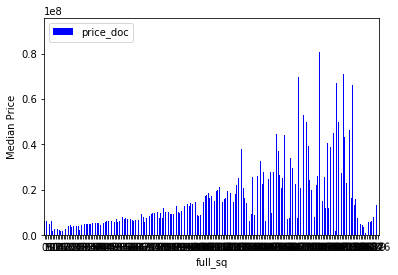

In [51]:
plt.figure(figsize=(10,6))
full_pivot.plot(kind='bar', color='blue')

plt.xlabel('full_sq')
plt.ylabel('Median Price')
plt.xticks(rotation=1)
plt.show()

Floor exploration

In [52]:
#target = np.log(train_df.price_doc)
condition_pivot = train_df.pivot_table(index='floor',values='log_price', aggfunc=np.mean)
       

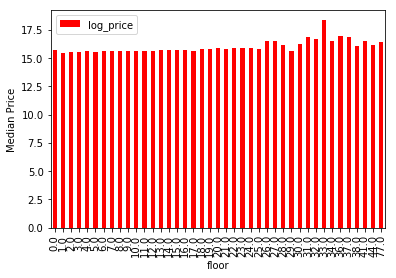

In [53]:
                             
plt.figure(figsize=(16,8))
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('floor')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()

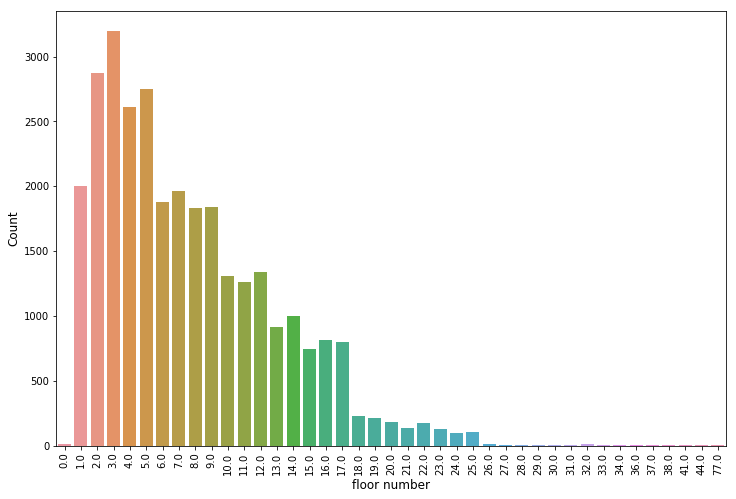

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x="floor", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
grouped_df_med = train_df.groupby('floor')['log_price'].aggregate(np.median).reset_index()
grouped_df_med.head()

,floor,log_price
0,0.0,15.742381
1,1.0,15.532829
2,2.0,15.608382
3,3.0,15.623799
4,4.0,15.649563


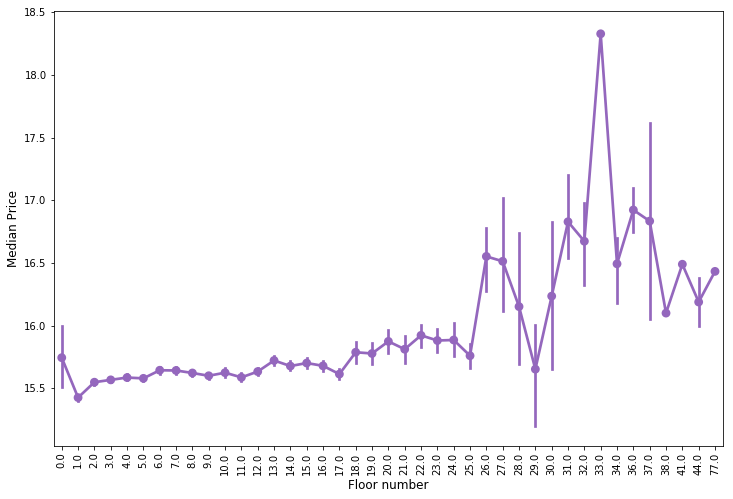

In [56]:
plt.figure(figsize=(12,8))
sns.pointplot(x="floor", y='log_price', data=train_df, alpha=0.3, color=color[4])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


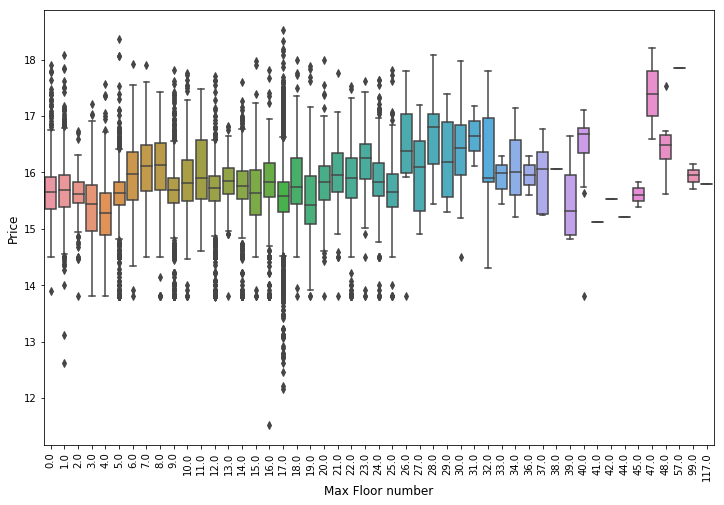

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x="max_floor", y='log_price', data=train_df)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

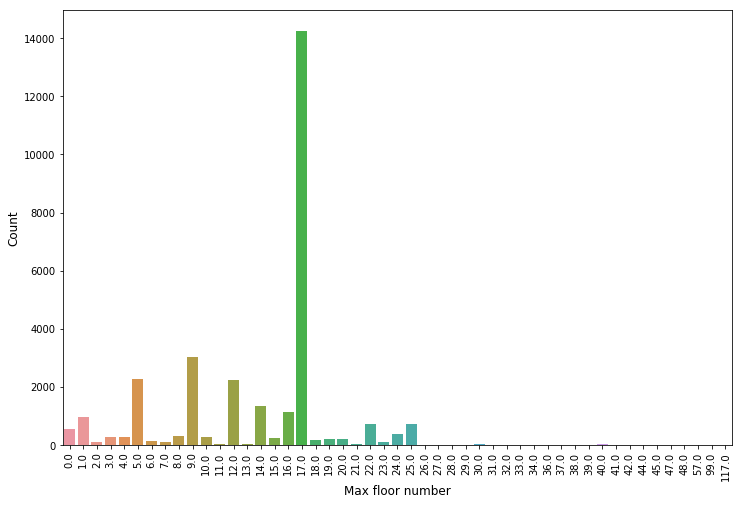

In [58]:
# Count sales of max floor 
plt.figure(figsize=(12,8))
sns.countplot(x="max_floor", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Max floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

i will use plt.scatter() to generate some scatter plots and visualize the relationship between the districts and price.

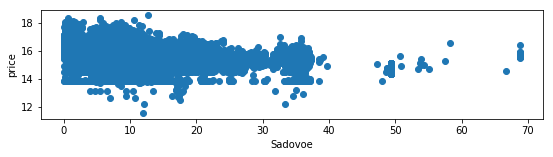

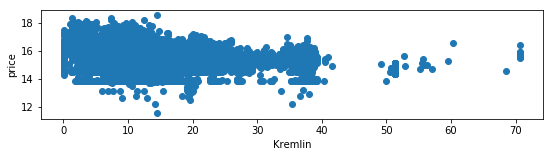

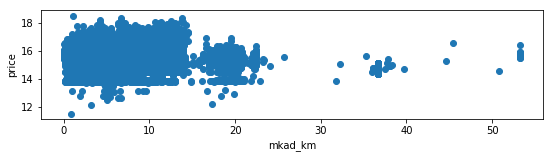

In [59]:
fig, axs = plt.subplots(figsize=(9, 2), sharey=True)

plt.scatter(x=train_df['sadovoe_km'], y=train_df['log_price'])
plt.ylabel('price')
plt.xlabel('Sadovoe')
plt.show()
plt.figure(figsize=(9,2))
plt.scatter(x=train_df['kremlin_km'], y=train_df['log_price'])
plt.ylabel('price')
plt.xlabel('Kremlin')
plt.show()
plt.figure(figsize=(9,2))
plt.scatter(x=train_df['mkad_km'], y=train_df['log_price'])
plt.ylabel('price')
plt.xlabel('mkad_km')
plt.show()

Very important especially in big city Relationship between Ecology and sub_area

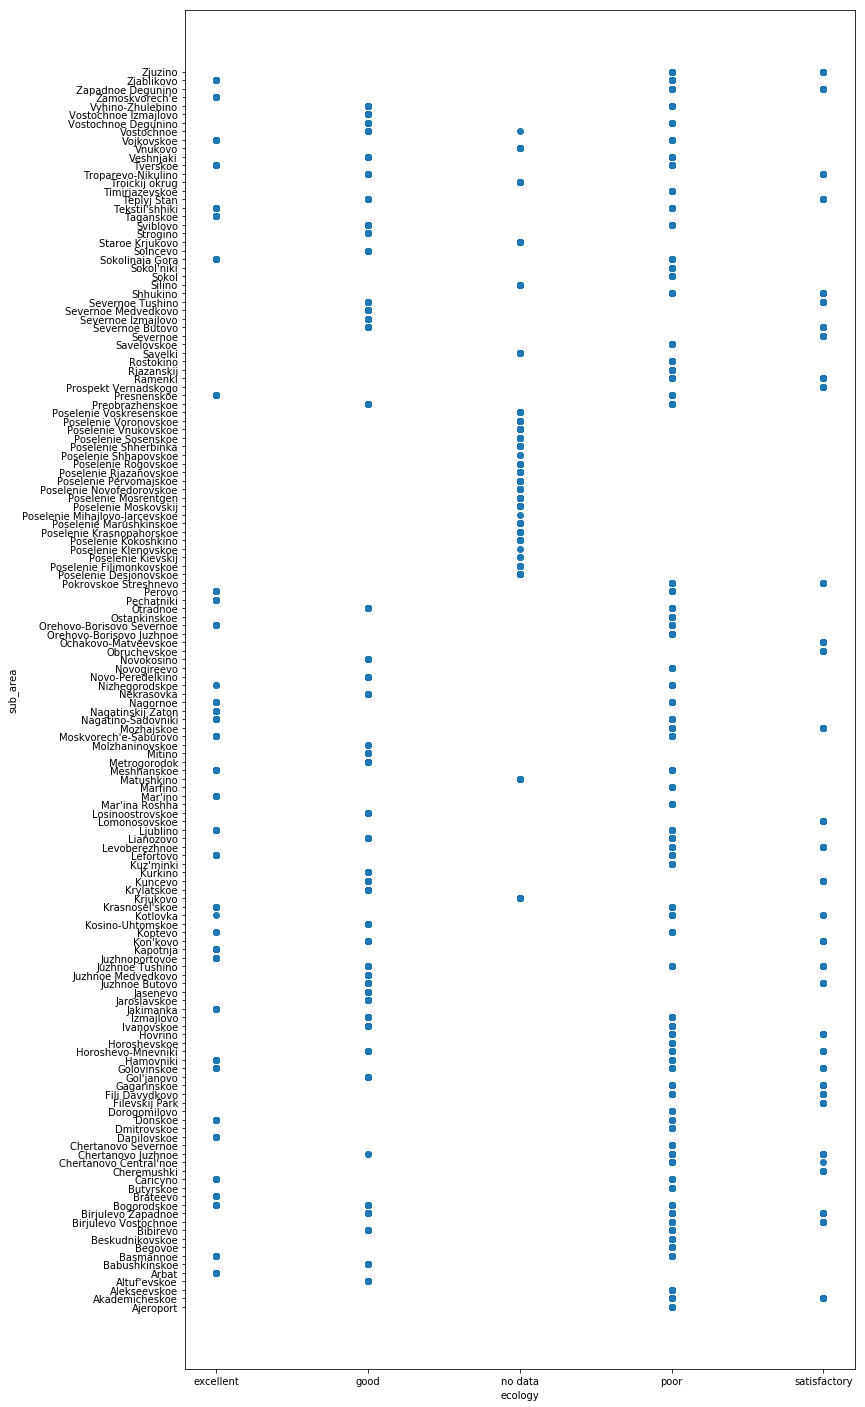

In [60]:
plt.figure(figsize=(12,25))
plt.scatter(x=train_df['ecology'], y=train_df['sub_area'])
plt.ylabel('sub_area')
plt.xlabel('ecology')
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145]), <a list of 146 Text xticklabel objects>)

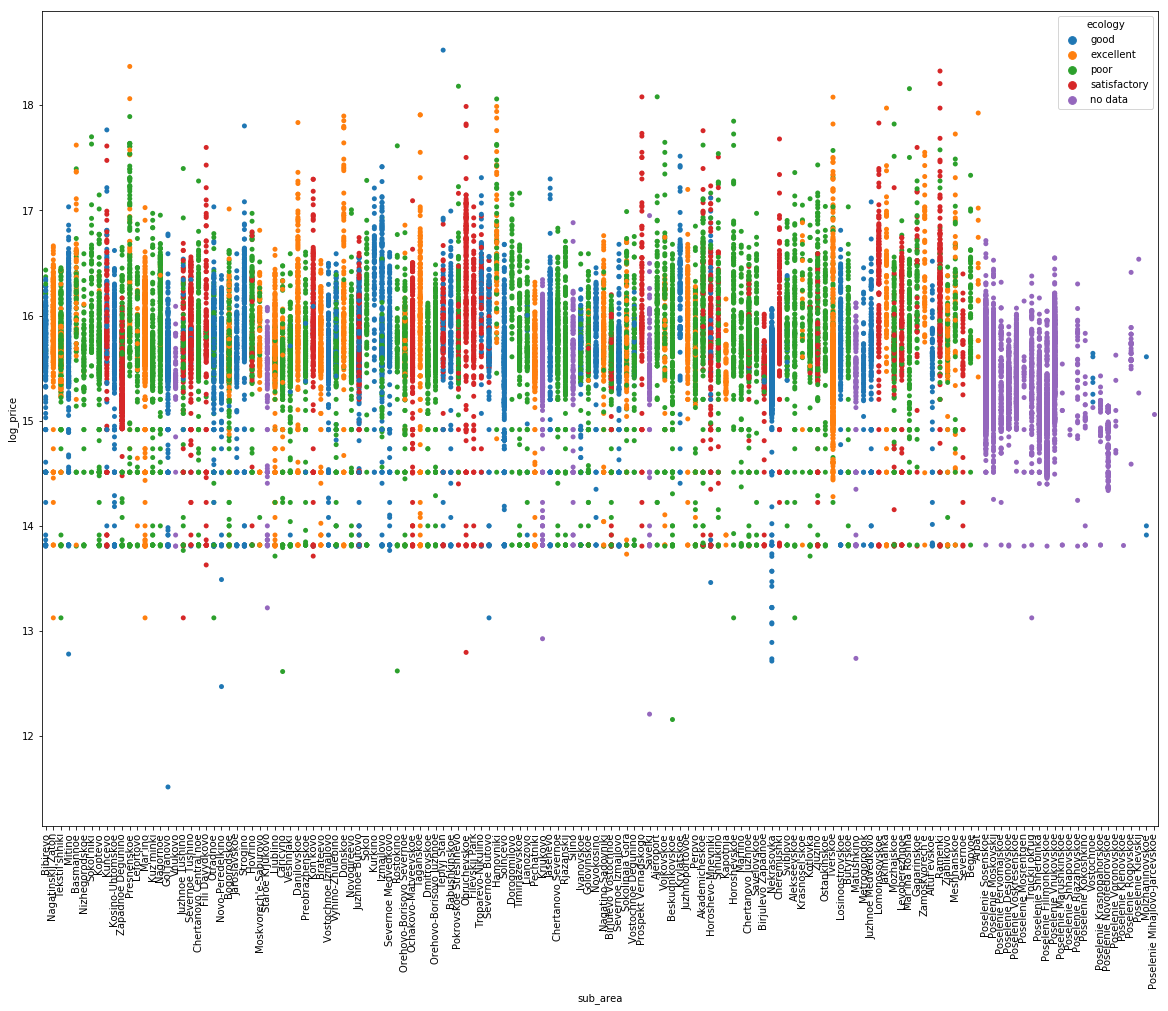

In [61]:
#in this plot we can see the connection between area ,price and ecology , 
#so we can better understand in which area it is better to buy appartment because the ecology is better,
#so it's maybe preferably on family with children
plt.figure(figsize=(20,15))
sns.stripplot(x='sub_area', y='log_price',hue ="ecology" ,data=train_df);
plt.xticks(rotation='vertical')

In [62]:
train_df.groupby('ecology')['log_price'].aggregate(np.mean).reset_index().sort_values(by = 'log_price', ascending= False).head()


,ecology,log_price
4,satisfactory,15.749764
0,excellent,15.719018
3,poor,15.674435
1,good,15.628160
2,no data,15.400097


# Relationship with categorical features

In [63]:

categoricals = train_df.select_dtypes(exclude=[np.number])
categoricals.head()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,new_datetime,yearmonth,week_num,week
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good,2011-08-20,08,2011-w33,w33
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent,2011-08-23,08,2011-w34,w34
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor,2011-08-27,08,2011-w34,w34
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good,2011-09-01,09,2011-w35,w35
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent,2011-09-05,09,2011-w36,w36


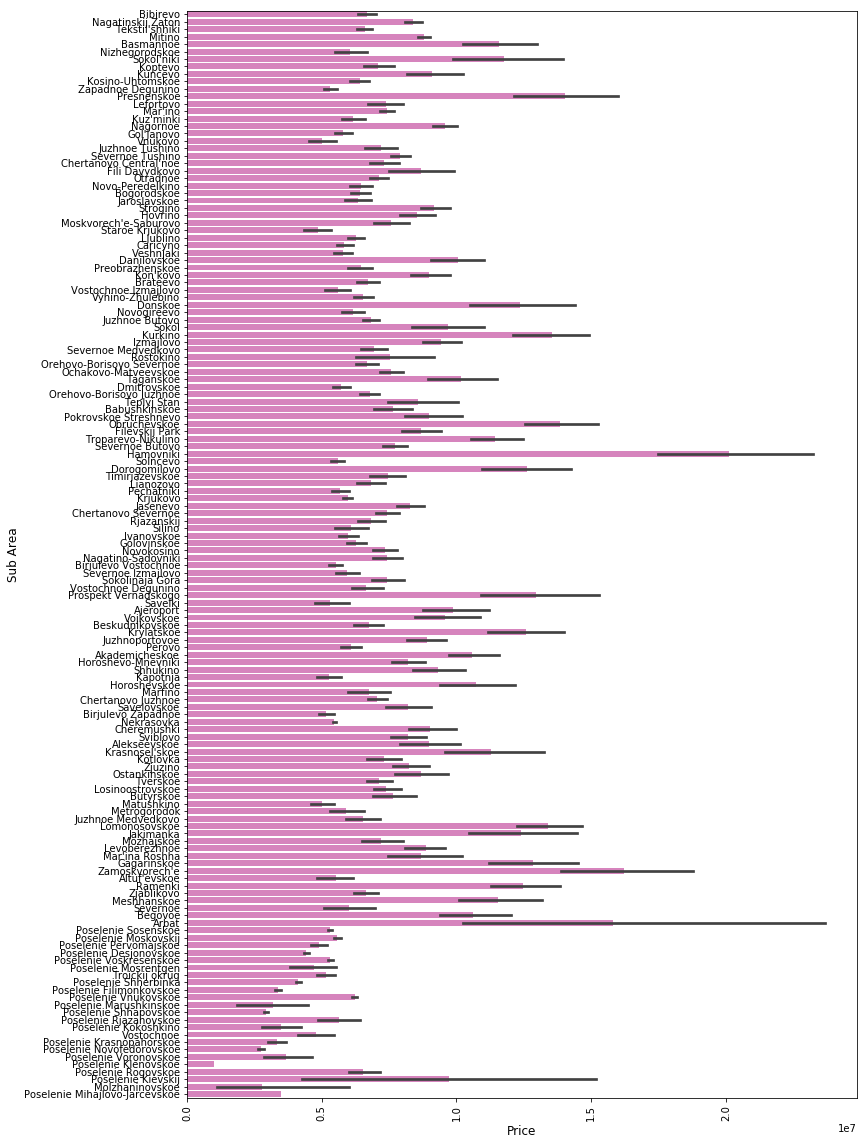

In [74]:
#sub_area

plt.figure(figsize=(12,20))
sns.barplot( train_df.price_doc.values,train_df.sub_area.values, color=color[6])
plt.ylabel('Sub Area', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


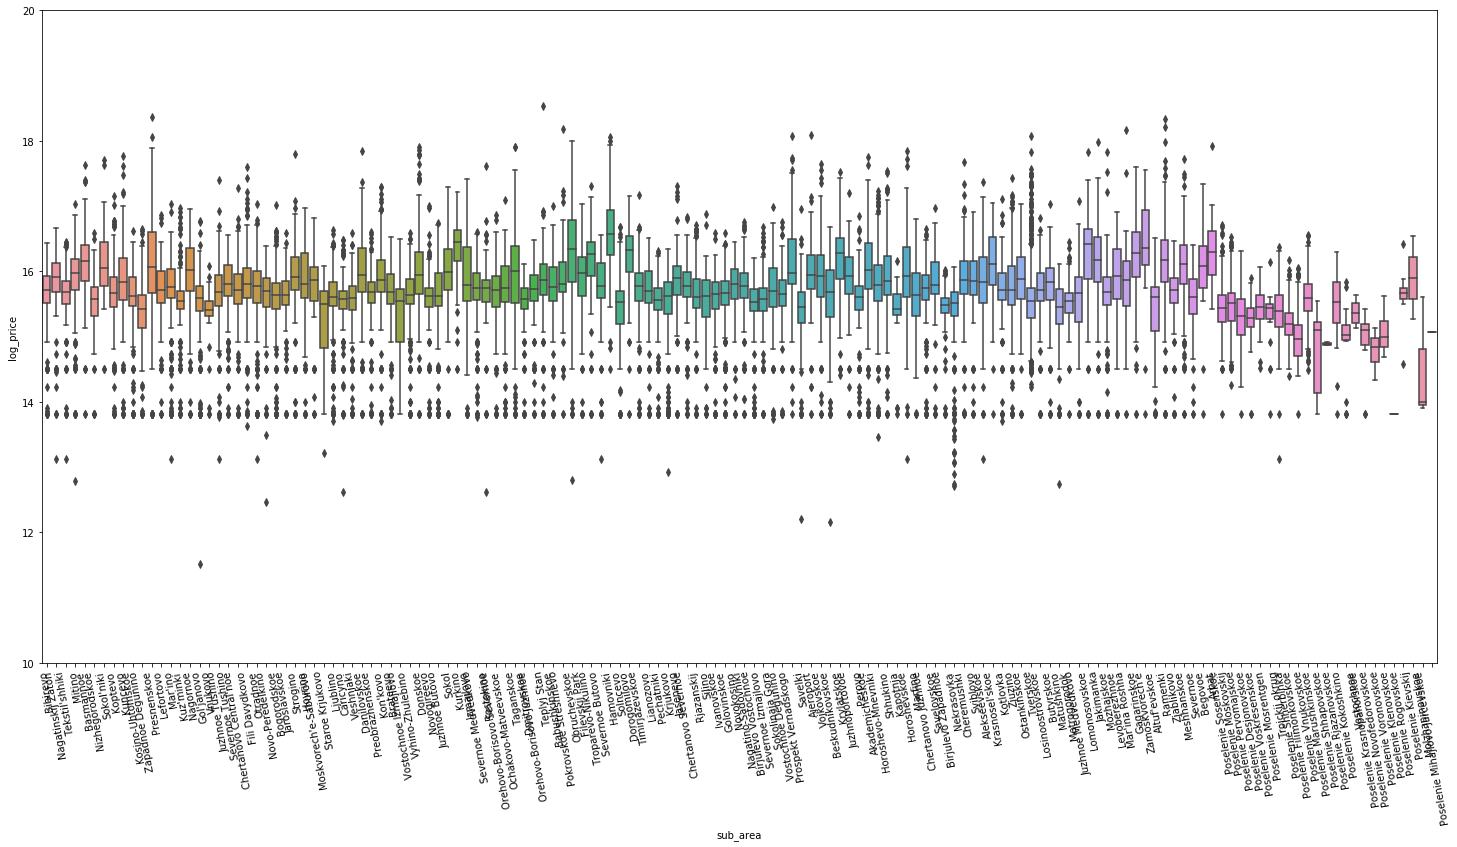

In [65]:
var = 'sub_area'
data = pd.concat([train_df['log_price'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 12))
fig = sns.boxplot(x=var, y='log_price', data=data)
fig.axis(ymin=10, ymax=20);
plt.xticks(rotation=100);

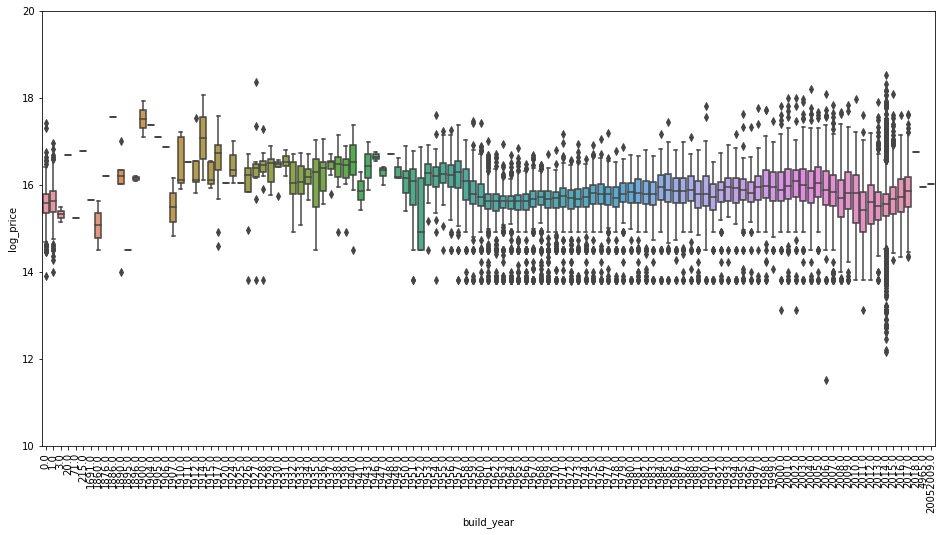

In [66]:
#Build year /price
var = 'build_year'
data = pd.concat([train_df['log_price'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="log_price", data=data)
fig.axis(ymin=10, ymax=20);
plt.xticks(rotation=90);

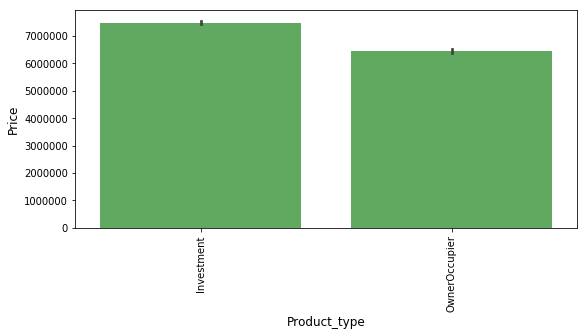

In [67]:
#Product Type
plt.figure(figsize=(9,4))
sns.barplot(train_df.product_type.values, train_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Price', fontsize=12)
plt.xlabel('Product_type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()